# How to Get Started With Deep Learning for Computer Vision (7-Day Mini-Course)
by Jason Brownlee on April 9, 2019. [Here](https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-computer-vision-7-day-mini-course/) in [Deep Learning for Computer Vision](https://machinelearningmastery.com/category/deep-learning-for-computer-vision/)


## Crash-Course Overview

- __Lesson 01__: Deep Learning and Computer Vision
- __Lesson 02__: Preparing Image Data
- __Lesson 03__: Convolutional Neural Networks
- __Lesson 04__: Image Classification
- __Lesson 05__: Train Image Classification Model
- __Lesson 06__: Image Augmentation
- __Lesson 07__: Face Detection


## Lesson 02: Preparing Image Data

Images are comprised of matrices of pixel values.

Pixel values are often unsigned integers in the range between 0 and 255. Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as slower than expected training of the model.

Instead, there can be great benefit in preparing the image pixel values prior to modeling, such as simply scaling pixel values to the range 0-1 to centering and even standardizing the values.

This is __called normalization__ and can be performed directly on a loaded image. The example below uses the PIL library (the standard image handling library in Python) to load an image and normalize its pixel values.

In [1]:
# example of pixel normalization
from numpy import asarray
from PIL import Image

# load image
image = Image.open('.\\images\\bondi_beach.jpg')
#image = Image.open('.\\images\\opencv-ocr-sample.jpg')
pixels = asarray(image)

# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# convert from integers to floats
pixels = pixels.astype('float32')

# normalize to the range 0-1
pixels /= 255.0

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


## Lesson 03: Convolutional Neural Networks

### Convolutional Layers
A [convolution](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) is the simple application of a filter to an input that results in an activation. Repeated application of the same filter to an input results in a map of activations called a feature map, indicating the locations and strength of a detected feature in an input, such as an image.

### Pooling Layers
[Pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) provide an approach to downsampling feature maps by summarizing the presence of features in patches of the feature map.

Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map.

### Classifier Layer
Once the features have been extracted, they can be interpreted and used to make a prediction, such as classifying the type of object in a photograph.

This can be achieved by first flattening the two-dimensional feature maps, and then adding a fully connected output layer. For a binary classification problem, the output layer would have one node that would predict a value between 0 and 1 for the two classes.

In [2]:
# cnn with single convolutional, pooling and output layer
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# create model
model = Sequential()

# add convolutional layer
model.add(Conv2D(32, (3,3), input_shape=(256, 256, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 516129    
Total params: 516,449
Trainable params: 516,449
Non-trainable params: 0
_________________________________________________________________


The example below creates a convolutional neural network that expects grayscale images with the square size of 256×256 pixels, with one convolutional layer with 32 filters, each with the size of 3×3 pixels, a max pooling layer, and a binary classification output layer.

## Lesson 04: Image Classification

In this lesson, you will discover how to use a pre-trained model to classify photographs of objects.

Deep convolutional neural network models may take days, or even weeks, to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks.

The example below uses the VGG-16 pre-trained model to classify photographs of objects into one of 1,000 known classes.

In [3]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [4]:
# load an image from file
image = load_img('.\\images\\dog.jpg', target_size=(224, 224))
## Doberman (33.59%)

# image = load_img('.\\images\\dog-chiguagua.jpg', target_size=(224, 224))
## toy_terrier (82.54%)

# image = load_img('.\\images\\cat.jpg', target_size=(224, 224))
## Egyptian_cat (61.94%)

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# load the model
model = VGG16()

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Doberman (33.59%)


## Lesson 05: Train Image Classification Model

In this lesson, you will discover how to train and evaluate a convolutional neural network for image classification.

The example below loads the dataset, scales the pixel values, then fits a convolutional neural network on the training dataset and evaluates the performance of the network on the test dataset.

In [5]:
# fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# convert from integers to floats
trainX, testX = trainX.astype('float32'), testX.astype('float32')

# normalize to range 0-1
trainX,testX  = trainX / 255.0, testX / 255.0

# one hot encode target values
trainY, testY = to_categorical(trainY), to_categorical(testY)

# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)

# evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss, acc)

Epoch 1/10
1875/1875 - 21s - loss: 0.3896 - accuracy: 0.8622
Epoch 2/10
1875/1875 - 21s - loss: 0.2592 - accuracy: 0.9059
Epoch 3/10
1875/1875 - 22s - loss: 0.2154 - accuracy: 0.9212
Epoch 4/10
1875/1875 - 22s - loss: 0.1852 - accuracy: 0.9312
Epoch 5/10
1875/1875 - 22s - loss: 0.1596 - accuracy: 0.9404
Epoch 6/10
1875/1875 - 23s - loss: 0.1390 - accuracy: 0.9477
Epoch 7/10
1875/1875 - 22s - loss: 0.1216 - accuracy: 0.9545
Epoch 8/10
1875/1875 - 24s - loss: 0.1028 - accuracy: 0.9620
Epoch 9/10
1875/1875 - 24s - loss: 0.0923 - accuracy: 0.9660
Epoch 10/10
1875/1875 - 22s - loss: 0.0783 - accuracy: 0.9715
0.35865548253059387 0.9063000082969666


## Lesson 06: Image Augmentation

In this lesson, you will discover how to use image augmentation.

__Image data augmentation__ is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

- [ImageDataGenerator class](https://keras.io/preprocessing/image/)

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The example below will load the photograph as a dataset and use image augmentation to create flipped and rotated versions of the image that can be used to train a convolutional neural network model.

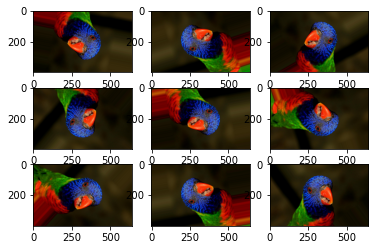

In [6]:
# example using image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('.\\images\\bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)

    # generate batch of images
    batch = it.next()
    
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint32')
    
    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
pyplot.show()

## Lesson 07: Face Detection

In this lesson, you will discover how to use a convolutional neural network for face detection.

Face detection is a trivial problem for humans to solve and has been solved reasonably well by classical feature-based techniques, such as the cascade classifier.

More recently, deep learning methods have achieved state-of-the-art results on standard face detection datasets

One example is the [Multi-task Cascade Convolutional Neural Network](https://arxiv.org/abs/1604.02878), or MTCNN for short.

- Github source. [Here](https://github.com/ipazc/mtcnn)
```
pip install mtcnn
print(mtcnn.__version__)
```

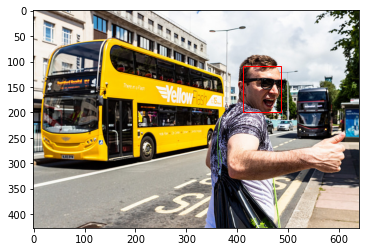

In [7]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# load image from file
pixels = pyplot.imread('.\\images\\street.jpg')

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)

# plot the image
pyplot.imshow(pixels)

# get the context for drawing boxes
ax = pyplot.gca()

# get coordinates from the first face
x, y, width, height = faces[0]['box']

# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')

# draw the box
ax.add_patch(rect)

# show the plot
pyplot.show()

```
import cv2
from mtcnn import MTCNN

detector = MTCNN()

#image = cv2.cvtColor(cv2.imread(".\\images\\street.jpg"), cv2.COLOR_BGR2RGB)
#image = cv2.cvtColor(cv2.imread(".\\images\\Scan0001.jpg"), cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(cv2.imread(".\\images\\EAROProfile.jpg"), cv2.COLOR_BGR2RGB)


result = detector.detect_faces(image)

# Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

cv2.imwrite(".\\images\\street_drawn.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

print(result)
```

```
import cv2
from mtcnn import MTCNN

img = cv2.cvtColor(cv2.imread(".\\images\\street.jpg"), cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(cv2.imread(".\\images\\Scan0001.jpg"), cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(cv2.imread(".\\images\\EAROProfile.jpg"), cv2.COLOR_BGR2RGB)

detector = MTCNN()
detector.detect_faces(img)
```